In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json

from config import g_key
# pd.set_option('display.max_rows', None) # code to not truncate dataframe when it is displayed

In [2]:
df= pd.read_csv("Resources/Data_Clean_Cases.csv")
df.head()
df = df[['location','people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
        'stringency_index','new_cases']]
df_country = df.groupby('location').max()
df_country = df_country.sort_values('people_fully_vaccinated_per_hundred',ascending=False).reset_index()


change_from = ['Bahamas',
               "Cote d'Ivoire",
               'Democratic Republic of Congo',
               'Congo',
               'Czechia',
               'Guinea-Bissau',
               'North Macedonia',
               'Serbia',
               'Timor',
               'Tanzania',
               'United States']

change_to = ['The Bahamas',
             'Ivory Coast',
             'Democratic Republic of the Congo',
             'Republic of the Congo',
             'Czech Republic',
             'Guinea Bissau',
             'Macedonia',
             'Republic of Serbia',
             'East Timor',
             'United Republic of Tanzania',
             'United States of America']


counter = 0
for country in change_from:
    find_index = df_country[df_country['location'] == country].index.values
    df_country.loc[find_index,'location'] = change_to[counter]
    counter=counter+1



vac_countries = df_country['location'].values.tolist()
people_fully_vaccinated_per_hundred = df_country['people_fully_vaccinated_per_hundred'].values.tolist()
stringency_index = df_country['stringency_index'].values.tolist()

df_country.sort_values('location',ascending=False)


,location,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,stringency_index,new_cases
123,Zimbabwe,21.58,16.72,87.96,3110.0
153,Zambia,1.64,2.66,70.83,3594.0
182,Yemen,1.01,0.16,64.81,174.0
117,Vietnam,48.89,19.44,96.30,17428.0
108,Venezuela,34.58,21.57,97.22,2979.0
...,...,...,...,...,...
151,Angola,11.16,4.24,90.74,1493.0
36,Andorra,70.21,61.69,65.74,299.0
137,Algeria,13.49,9.04,92.13,1927.0
92,Albania,34.20,29.94,89.81,1239.0


In [4]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '1000px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'}
fig = gmaps.figure(layout=figure_layout)

In [5]:
countries_string = requests.get(
    "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
).content
countries = json.loads(countries_string)

country_list = []

for x in range(0,len(countries['features'])):
    country_list.append(countries['features'][x]['properties']['name'])
    

In [6]:
fillo = []
fillo_percent = []


for country in country_list:
    try:
        vac_countries.index(country)>=0
        z = vac_countries.index(country)
        fillo.append(people_fully_vaccinated_per_hundred[z]/100)
        fillo_percent.append(people_fully_vaccinated_per_hundred[z])
    except:
        fillo.append(0)
        fillo_percent.append(0)

        
        
temp_df = pd.DataFrame({'country':country_list,
                        'people_fully_vaccinated_per_hundred':fillo,
                        'Percent_People_Fully_Vaccinated':fillo_percent
                        })


temp_df.sort_values('country', ascending=False)

,country,people_fully_vaccinated_per_hundred,Percent_People_Fully_Vaccinated
179,Zimbabwe,0.1672,16.72
178,Zambia,0.0266,2.66
176,Yemen,0.0016,0.16
139,Western Sahara,0.0000,0.00
175,West Bank,0.0000,0.00
...,...,...,...
6,Antarctica,0.0000,0.00
1,Angola,0.0424,4.24
46,Algeria,0.0904,9.04
2,Albania,0.2994,29.94


In [8]:
fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='red', fill_opacity=fillo)#, info_box_content=full_vac_info)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

In [12]:
df_cases = df.groupby('location').sum()
df_cases = df_cases.reset_index()
df_cases

change_from = ['Bahamas',
               "Cote d'Ivoire",
               'Democratic Republic of Congo',
               'Congo',
               'Czechia',
               'Guinea-Bissau',
               'North Macedonia',
               'Serbia',
               'Timor',
               'Tanzania',
               'United States']

change_to = ['The Bahamas',
             'Ivory Coast',
             'Democratic Republic of the Congo',
             'Republic of the Congo',
             'Czech Republic',
             'Guinea Bissau',
             'Macedonia',
             'Republic of Serbia',
             'East Timor',
             'United Republic of Tanzania',
             'United States of America']


counter = 0
for country in change_from:
    find_index = df_cases[df_cases['location'] == country].index.values
    df_cases.loc[find_index,'location'] = change_to[counter]
    counter=counter+1

case_countries = df_cases['location'].values.tolist()
new_cases = df_cases['new_cases'].values.tolist()
Total_cases_worldwide = df_cases['new_cases'].sum()
Total_cases_worldwide


new_cases_percent=[row['new_cases']/Total_cases_worldwide for index, row in df_cases.iterrows()]
new_cases_percent

max_num = max(new_cases_percent)
max_num
new_cases_adjusted = [case/max(new_cases_percent)for case in new_cases_percent]


# max(new_cases_adjusted)
# df_cases.sort_values('location',ascending=False).head(30)

1.0

In [22]:
newo = []

for country in country_list:
    try:
        case_countries.index(country)>=0
        z = case_countries.index(country)
        newo.append(new_cases_adjusted[z])
    except:
        newo.append(0)


        
        
temp_df = pd.DataFrame({'country':country_list,
                        'new_cases_adjusted':newo
                        })


temp_df.sort_values('country', ascending=True).head()

,country,new_cases_adjusted
0,Afghanistan,0.003447
2,Albania,0.003969
46,Algeria,0.004545
1,Angola,0.001401
6,Antarctica,0.000000


In [74]:
fig = gmaps.figure()
geojson = gmaps.geojson_layer(countries,fill_color='blue', fill_opacity=newo)
fig.add_layer(geojson)
fig

Figure(layout=FigureLayout(height='420px'))

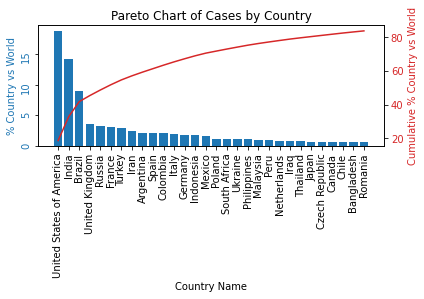

80% of the world's cases are in 23 countries out of the 186 countries analysed
20% of the countries with the highest cases count accounts for 87.47% of cases


In [88]:
plt_df = pd.DataFrame({'country':case_countries,
                        'new_cases_percent':new_cases_percent
                        })

plt_df = plt_df.sort_values('new_cases_percent', ascending =False).reset_index()
plt_df.pop('index')
plt_df

plt_df ['cumulative %']="" 
cumulative = 0
rownum = 0
for index, row in plt_df.iterrows():
    cumulative = cumulative + (row ['new_cases_percent'] *100)
    plt_df.loc[rownum,'cumulative %'] = cumulative
    plt_df.loc[rownum,'new_cases_percent'] = row['new_cases_percent']*100
    rownum = rownum + 1
    
country20 = round(plt_df.loc[int(0.2*len(plt_df['country']))]['cumulative %'],2) 
plt_df = plt_df.head(30)
plt_df

# plt.bar(plt_df['country'], plt_df['new_cases_percent'], color='blue', alpha=0.5, align="center")
# plt.plot(plt_df['country'],plt_df['cumulative %'])

# plt.xticks(rotation = 90)
# plt.xlabel('Country Name')
# plt.ylabel('% of cases in the world')
# plt.title('Pareto Chart of Cases by Country')


fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Country Name')
ax1.tick_params(rotation = 90)
ax1.set_ylabel('% Country vs World', color=color)
ax1.bar(plt_df['country'], plt_df['new_cases_percent'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Cumulative % Country vs World', color=color)  # we already handled the x-label with ax1
ax2.plot(plt_df['country'],plt_df['cumulative %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Pareto Chart of Cases by Country')
plt.show()


print(f"80% of the world's cases are in 23 countries out of the 186 countries analysed")
print(f'20% of the countries with the highest cases count accounts for {country20}% of cases')